In [11]:
import json
import os
from collections import defaultdict
import traceback
import xml.etree.ElementTree as ET
from xml.dom import minidom
import argparse

import fitz
from fitz import Rect
from PIL import Image
import numpy as np
from tqdm import tqdm
import editdistance

from os import path
from PIL import Image
from PIL import ImageFont, ImageDraw
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [12]:
def create_document_page_image(doc, page_num, output_image_max_dim=1000):
    page = doc[page_num]
    page_width = page.rect[2]
    page_height = page.rect[3]
    
    if page_height > page_width:
        zoom = output_image_max_dim / page_height
        output_image_height = output_image_max_dim
        output_image_width = int(round(output_image_max_dim * page_width / page_height))
    else:
        zoom = output_image_max_dim / page_width
        output_image_width = output_image_max_dim
        output_image_height = int(round(output_image_max_dim * page_height / page_width))
        
    mat = fitz.Matrix(zoom, zoom)
    pix = page.get_pixmap(matrix = mat, alpha = False)
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    
    return img

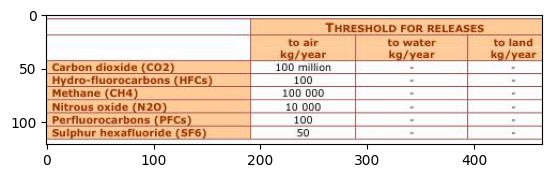

In [13]:
table_image_filepath = "C:/Users/PC/Desktop/git/icdar_2013_processing/output/ICDAR-2013.c_Image_Structure_PASCAL_VOC/images/competition-dataset-eu_eu-001_table_0.jpg"
test_img = Image.open(table_image_filepath)
plt.imshow(test_img)
plt.show()

In [14]:
words_path = "C:/Users/PC/Desktop/git/icdar_2013_processing/output/ICDAR-2013.c_Image_Table_Words_JSON/competition-dataset-eu_eu-001_table_0_words.json"
with open(words_path, 'r') as f:
    words = json.load(f)

In [15]:
annotation_test_path = "C:/Users/PC/Desktop/git/icdar_2013_processing/output/ICDAR-2013.c_PDF_Annotations_JSON/competition-dataset-eu_eu-001_tables.json"
with open(annotation_test_path, 'r') as f:
    annotations = json.load(f)

In [16]:
pdf_filepath = "D:/ICDAR-2013-Table-Competition-Corrected (2)/ICDAR-2013-Table-Competition-Corrected/competition-dataset-eu/eu-001.pdf"

In [17]:
xml_filepath = pdf_filepath.replace(".pdf", "-str.xml")
xml_filepath

'D:/ICDAR-2013-Table-Competition-Corrected (2)/ICDAR-2013-Table-Competition-Corrected/competition-dataset-eu/eu-001-str.xml'

In [18]:
doc = fitz.open(pdf_filepath)
# page_xml_data = 

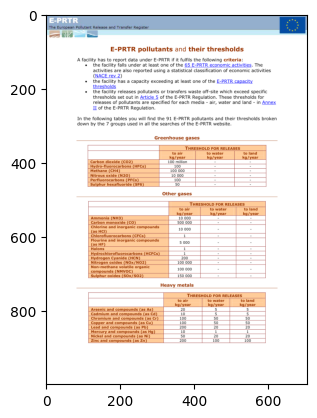

In [19]:
output_image_max_dim = 1000
table_dict = annotations[0]
page_num = table_dict['pdf_page_index']
page_rect = list(doc[page_num].rect)
scale = output_image_max_dim / max(page_rect)
page_img = create_document_page_image(doc, page_num, output_image_max_dim=output_image_max_dim)
page_img_np = np.array(page_img)
plt.imshow(page_img_np)
plt.show()    
# page_img


In [20]:
table_num = table_dict['document_table_index']
table_num

0

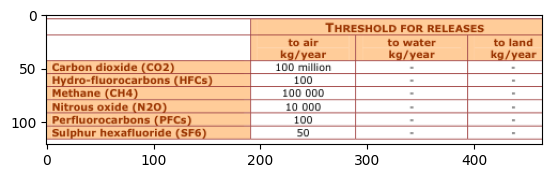

In [23]:
page_num = table_dict['pdf_page_index']
page_rect = list(doc[page_num].rect)
scale = output_image_max_dim / max(page_rect)
table_bbox = table_dict['pdf_table_bbox']
crop_bbox = [int(round(scale * elem)) for elem in table_bbox]
padding = 5
crop_bbox = [crop_bbox[0] - padding, crop_bbox[1] - padding, crop_bbox[2] + padding, crop_bbox[3] + padding]
table_img = page_img.crop(crop_bbox)    
table_img_np = np.array(table_img)
plt.imshow(table_img_np)
plt.show()

[261, 5, 410, 19]
[219, 20, 262, 43]
[320, 20, 365, 43]
[416, 20, 459, 43]
[5, 44, 121, 55]
[214, 44, 267, 55]
[340, 44, 344, 55]
[435, 44, 439, 55]
[5, 56, 156, 67]
[231, 56, 250, 67]
[340, 56, 344, 67]
[435, 56, 439, 67]
[5, 68, 86, 79]
[221, 68, 260, 79]
[340, 68, 344, 79]
[435, 68, 439, 79]
[5, 80, 113, 92]
[224, 80, 257, 92]
[340, 80, 344, 92]
[435, 80, 439, 92]
[5, 92, 137, 104]
[231, 92, 250, 104]
[340, 92, 344, 104]
[435, 92, 439, 104]
[5, 104, 151, 116]
[235, 104, 247, 116]
[340, 104, 344, 116]
[435, 104, 439, 116]


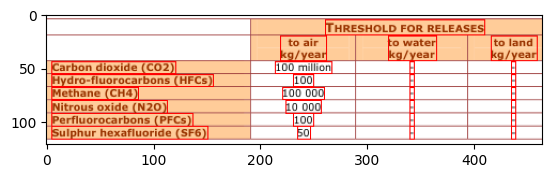

In [32]:
table_image_copy = table_img.copy()
draw = ImageDraw.Draw(table_image_copy)
for cell in table_dict['cells']:
    cell_bbox = cell['pdf_text_tight_bbox']
    cell_bbox = [int(round(scale * elem)) for elem in cell_bbox]
    try:
        x1 = cell_bbox[0]
        y1 = cell_bbox[1]
        x2 = cell_bbox[2]
        y2 = cell_bbox[3]
        x1_new = x1 - crop_bbox[0]
        y1_new = y1 - crop_bbox[1]  
        x2_new = x2 - crop_bbox[0]
        y2_new = y2 - crop_bbox[1]
        cell_bbox = [x1_new, y1_new, x2_new, y2_new]
        print(cell_bbox)
        draw.rectangle(cell_bbox, outline="red")
    except:
        pass
plt.imshow(table_image_copy)
plt.show()

In [ ]:

table_dict['pdf_table_bbox']

[100.55999755859375, 298.8058776855469, 482.2666015625, 392.3351745605469]

In [30]:
mediabox = doc[table_dict['pdf_page_index']].mediabox
mediabox

Rect(0.0, 0.0, 595.0, 842.0)

In [21]:
table_dict['cells']

[{'pdf_text_tight_bbox': [316.0199890136719,
   298.8058776855469,
   441.2596435546875,
   310.9835205078125],
  'text_content': 'THRESHOLD FOR RELEASES',
  'row_nums': [0],
  'column_nums': [1, 2, 3],
  'is_column_header': True,
  'is_projected_row_header': False,
  'pdf_bbox': [276.30035400390625,
   298.8058776855469,
   482.2666015625,
   310.9835205078125],
  'pdf_text_content': 'THRESHOLD FOR RELEASES'},
 {'pdf_text_tight_bbox': [280.44000244140625,
   311.5368347167969,
   316.6665954589844,
   330.9552001953125],
  'text_content': 'to air\nkg/year',
  'row_nums': [1],
  'column_nums': [1],
  'is_column_header': True,
  'is_projected_row_header': False,
  'pdf_bbox': [276.30035400390625,
   311.5368347167969,
   320.7275085449219,
   330.9552001953125],
  'pdf_text_content': 'to air kg/year'},
 {'pdf_text_tight_bbox': [365.1000061035156,
   311.5368347167969,
   403.0207214355469,
   330.9552001953125],
  'text_content': 'to water\nkg/year',
  'row_nums': [1],
  'column_nums': 